## NLP : Sentiment Analysis using various RNN Architectures RNN, GRU, and LSTM.

In [3]:
from tensorflow import keras
from keras.datasets import imdb
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout

##### Data loading

In [4]:
max_features = 10000  
maxlen = 100  
batch_size = 32

In [5]:
# load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

##### Padding

In [6]:
# Pad sequences to ensure equal length
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [7]:
x_train.shape

(25000, 100)

In [8]:
x_test.shape

(25000, 100)

### SimpleRNN

In [9]:
# Build the model architecture
# SimpleRNN model
model_rnn = Sequential([
    Embedding(input_dim = max_features, output_dim = 2, input_length = maxlen),
    SimpleRNN(32, return_sequences=False),
    Dropout(0.7),
    Dense(1, activation='sigmoid')
    ])

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 2)            20000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1120      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21153 (82.63 KB)
Trainable params: 21153 (82.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile the models
model_rnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [11]:
# Train the models
rnn_history = model_rnn.fit(x_train,y_train, epochs=5, validation_data= (x_test, y_test))

Epoch 1/5
782/782 [==============================] - 19s 22ms/step - loss: 0.6933 - acc: 0.5093 - val_loss: 0.6873 - val_acc: 0.5311
Epoch 2/5
782/782 [==============================] - 21s 27ms/step - loss: 0.6365 - acc: 0.6480 - val_loss: 0.5817 - val_acc: 0.7437
Epoch 3/5
782/782 [==============================] - 21s 26ms/step - loss: 0.4594 - acc: 0.8097 - val_loss: 0.4792 - val_acc: 0.7807
Epoch 4/5
782/782 [==============================] - 21s 27ms/step - loss: 0.4060 - acc: 0.8315 - val_loss: 0.7617 - val_acc: 0.7059
Epoch 5/5
782/782 [==============================] - 21s 26ms/step - loss: 0.3631 - acc: 0.8624 - val_loss: 0.4126 - val_acc: 0.8188


In [12]:
# Evaluate the model
loss_rnn, accuracy_rnn = model_rnn.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.4126 - acc: 0.8188


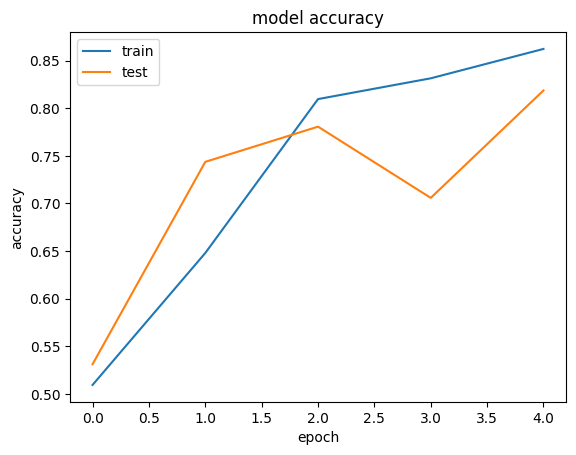

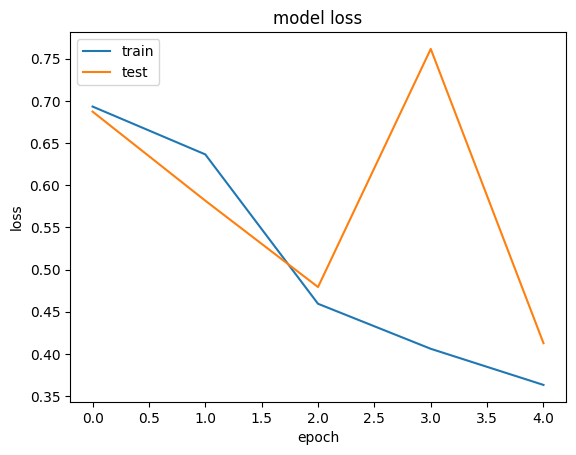

In [14]:
# Model Performance Charts
import matplotlib.pyplot as plt

plt.plot(rnn_history.history['acc'])
plt.plot(rnn_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(rnn_history.history['loss'])
plt.plot(rnn_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### LSTM

In [18]:
# LSTM model
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=maxlen),
    LSTM(units=32),
    Dense(units=1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

LSTM_history = model_lstm.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

loss_lstm, accuracy_lstm = model_lstm.evaluate(x_test, y_test)

Epoch 1/5
196/196 [==============================] - 19s 79ms/step - loss: 0.4804 - accuracy: 0.7648 - val_loss: 0.3520 - val_accuracy: 0.8486
Epoch 2/5
196/196 [==============================] - 15s 75ms/step - loss: 0.2801 - accuracy: 0.8860 - val_loss: 0.3539 - val_accuracy: 0.8435
Epoch 3/5
196/196 [==============================] - 15s 74ms/step - loss: 0.2233 - accuracy: 0.9154 - val_loss: 0.4021 - val_accuracy: 0.8385
Epoch 4/5
196/196 [==============================] - 15s 75ms/step - loss: 0.1856 - accuracy: 0.9329 - val_loss: 0.4137 - val_accuracy: 0.8347
Epoch 5/5
782/782 [==============================] - 9s 11ms/step - loss: 0.4658 - accuracy: 0.8306


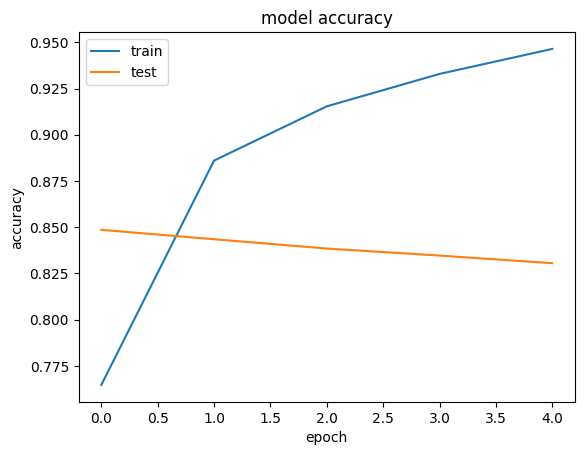

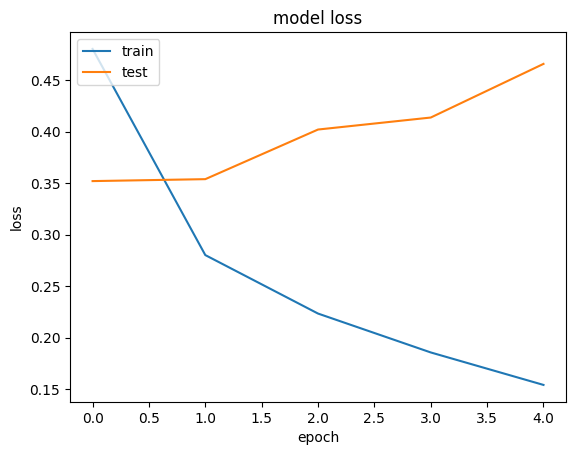

In [22]:
# Model Performance Charts
import matplotlib.pyplot as plt

plt.plot(LSTM_history.history['accuracy'])
plt.plot(LSTM_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(LSTM_history.history['loss'])
plt.plot(LSTM_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### GRU

In [23]:
# GRU model
model_gru = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=maxlen),
    GRU(units=32),
    Dense(units=1, activation='sigmoid')
])


model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

GRU_history = model_gru.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

loss_gru, accuracy_gru = model_gru.evaluate(x_test, y_test)

Epoch 1/5
196/196 [==============================] - 15s 63ms/step - loss: 0.5212 - accuracy: 0.7163 - val_loss: 0.4295 - val_accuracy: 0.8086
Epoch 2/5
196/196 [==============================] - 12s 63ms/step - loss: 0.2987 - accuracy: 0.8779 - val_loss: 0.3563 - val_accuracy: 0.8496
Epoch 3/5
196/196 [==============================] - 12s 62ms/step - loss: 0.2309 - accuracy: 0.9110 - val_loss: 0.4107 - val_accuracy: 0.8386
Epoch 4/5
196/196 [==============================] - 12s 61ms/step - loss: 0.1927 - accuracy: 0.9312 - val_loss: 0.4034 - val_accuracy: 0.8393
Epoch 5/5
782/782 [==============================] - 7s 9ms/step - loss: 0.4711 - accuracy: 0.8325


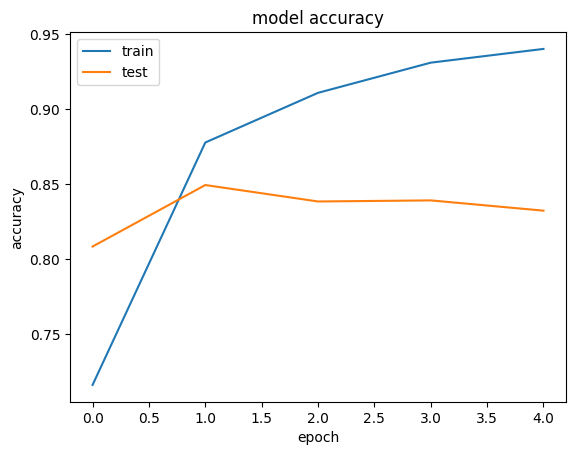

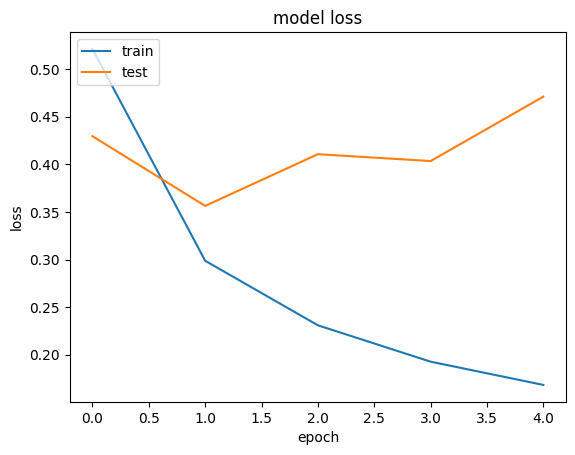

In [24]:
# Model Performance Charts
import matplotlib.pyplot as plt

plt.plot(GRU_history.history['accuracy'])
plt.plot(GRU_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(GRU_history.history['loss'])
plt.plot(GRU_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [25]:

print(f"SimpleRNN - Loss: {loss_rnn:.3f} Accuracy: {accuracy_rnn*100:.2f}%")
print(f"LSTM - Loss: {loss_lstm:.3f} Accuracy: {accuracy_lstm*100:.2f}%")
print(f"GRU - Loss: {loss_gru:.3f} Accuracy: {accuracy_gru*100:.2f}%")

SimpleRNN - Loss: 0.413 Accuracy: 81.88%
LSTM - Loss: 0.466 Accuracy: 83.06%
GRU - Loss: 0.471 Accuracy: 83.25%


#### Testing Model with Unknown Data

In [33]:
test_imdb = ["Wow! What a masterpiece! The cinematography was breathtaking, the performances were captivating, and the emotional depth of the story left me speechless. I haven't been so moved by a film in years. Truly a must-see.",
             "This movie was absolutely fantastic! The acting was superb, and the plot kept me on the edge of my seat the entire time. I highly recommend it to anyone looking for a thrilling experience at the movies.",
             "Bad!, waste of money!, Do not watch it.",
             "I was really disappointed with this film. The story was confusing, the characters were dull, and the pacing was incredibly slow. I struggled to stay interested and ended up leaving the theater early."
             ]

# Tokenize and pad the new random texts
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(test_imdb)
new_sequences = tokenizer.texts_to_sequences(test_imdb)
new_data = pad_sequences(new_sequences, padding='post', maxlen=maxlen)

# Predict sentiment for the new random texts
predictions = model_gru.predict(new_data)

# Display the predictions
for i, prediction in enumerate(predictions):
    print(f"Text: {test_imdb[i]}")
    print(f"Sentiment: {'Positive' if prediction > 0.5 else 'Negative'}")
    print()

print(predictions)

1/1 [==============================] - 0s 49ms/step
Text: Wow! What a masterpiece! The cinematography was breathtaking, the performances were captivating, and the emotional depth of the story left me speechless. I haven't been so moved by a film in years. Truly a must-see.
Sentiment: Positive

Text: This movie was absolutely fantastic! The acting was superb, and the plot kept me on the edge of my seat the entire time. I highly recommend it to anyone looking for a thrilling experience at the movies.
Sentiment: Positive

Text: Bad!, waste of money!, Do not watch it.
Sentiment: Negative

Text: I was really disappointed with this film. The story was confusing, the characters were dull, and the pacing was incredibly slow. I struggled to stay interested and ended up leaving the theater early.
Sentiment: Negative

[[0.5746277 ]
 [0.9774572 ]
 [0.01501183]
 [0.49101868]]
